In [1]:
import pandas as pd 
import numpy as np
import pickle 

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns

In [114]:
# load pickles
news_sent_pkl = open("news_sent.pkl", "rb")
news = pickle.load(news_sent_pkl)

news_pkl = open("news_sent_all.pkl", "rb")
news_df = pickle.load(news_pkl)

In [97]:
# reformat news
news["Date"] = pd.to_datetime(news["Date"])
news = pd.DataFrame(news.groupby("Date").mean())
news.sort_values(by="Date",inplace=True)

In [98]:
news.reset_index(inplace=True)

In [115]:
# reformat news_df date
news_df["Date"] = news_df["Date"].dt.date
news_df["Date"] = pd.to_datetime(news_df["Date"])
news_df.head()

,Date,Headline,Headline_Sentiment,Abstract,Abstract_Sentiment
0,2010-06-22,"elon musk, paypal pioneer, is paper-rich, cash...",0.0000,"elon musk, a serial entrepreneur who has made ...",-0.2960
1,2012-05-31,"its first mission done, spacex looks to more p...",0.0000,the first commercial mission to ferry supplies...,0.4939
2,2012-06-25,tesla model s offers a lesson in electric-vehi...,0.0000,"with three battery packs available, the newly ...",0.0000
3,2012-08-03,toyota and tesla trot out the rav4 ev,0.0000,"the rav4 ev, a battery-powered crossover joint...",0.0000
4,2012-10-23,wheelies: the charged argument edition,-0.5106,elon musk defended tesla motors against allega...,0.3818


In [116]:
news_df.sort_values("Date",inplace=True)
news_df.head()

,Date,Headline,Headline_Sentiment,Abstract,Abstract_Sentiment
0,2010-06-22,"elon musk, paypal pioneer, is paper-rich, cash...",0.0000,"elon musk, a serial entrepreneur who has made ...",-0.2960
1,2012-05-31,"its first mission done, spacex looks to more p...",0.0000,the first commercial mission to ferry supplies...,0.4939
2,2012-06-25,tesla model s offers a lesson in electric-vehi...,0.0000,"with three battery packs available, the newly ...",0.0000
3,2012-08-03,toyota and tesla trot out the rav4 ev,0.0000,"the rav4 ev, a battery-powered crossover joint...",0.0000
4,2012-10-23,wheelies: the charged argument edition,-0.5106,elon musk defended tesla motors against allega...,0.3818


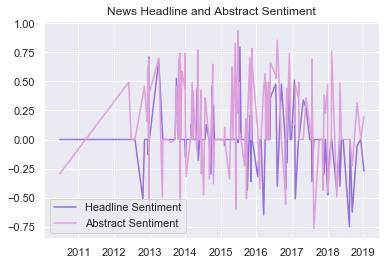

In [192]:
x = news_df["Date"]
y1 = news_df["Headline_Sentiment"] 
y2 = news_df["Abstract_Sentiment"]

sns.set()
plt.title("News Headline and Abstract Sentiment")
plt.plot(x,y1,label="Headline Sentiment", color="mediumpurple")
plt.plot(x,y2,label="Abstract Sentiment", color="plum")
plt.legend(loc="lower left");

In [126]:
news_df.corr()

,Headline_Sentiment,Abstract_Sentiment
Headline_Sentiment,1.000000,0.067868
Abstract_Sentiment,0.067868,1.000000


In [130]:
news_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160 entries, 0 to 159
Data columns (total 5 columns):
Date                  160 non-null datetime64[ns]
Headline              160 non-null object
Headline_Sentiment    160 non-null float64
Abstract              160 non-null object
Abstract_Sentiment    160 non-null float64
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 7.5+ KB


In [132]:
# get headlines with most sentiment value 
small_df = news_df[(news_df["Headline_Sentiment"] !=0) & (news_df["Abstract_Sentiment"] !=0)]

In [134]:
small_df.Date.dt.year.value_counts()

2016    8
2018    6
2015    6
2017    5
2014    4
2013    4
2012    4
2019    1
Name: Date, dtype: int64

### Take sample size to compare with stocks

In [135]:
# find the year with the most data
small_df.Date.dt.year.value_counts() # I'm going to use 2016 data

2016    8
2018    6
2015    6
2017    5
2014    4
2013    4
2012    4
2019    1
Name: Date, dtype: int64

In [140]:
# 2016 news 
small_df = small_df[small_df["Date"].dt.year == 2016]

In [150]:
small_df

,Date,Headline,Headline_Sentiment,Abstract,Abstract_Sentiment
99,2016-01-15,"loose lips sink careers, even for c.e.o.s",-0.3182,business leaders have become social-media craz...,0.0772
103,2016-03-16,why vinyl records and other ‘old’ technologies...,-0.6486,"we may be obsessed with new gadgets, but we st...",0.4404
115,2016-05-24,"automakers befriend start-ups like uber, girdi...",0.3612,companies like toyota and volkswagen are suppo...,0.6597
116,2016-07-17,artificial intelligence swarms silicon valley ...,0.4767,the valley has found its next shiny new thing ...,0.5574
117,2016-07-21,water out of the tailpipe: a new class of elec...,0.3400,"in california, state subsidies for hydrogen fi...",0.5267
118,2016-08-03,tesla’s big loss reflects its costly ambitions,-0.4019,the electric carmaker’s second-quarter loss gr...,0.8555
121,2016-10-27,measure in florida that claims to back solar p...,-0.4215,opponents of the proposed constitutional amend...,-0.5563
124,2016-12-05,how entrepreneurs can make peace with undivers...,0.5423,knowing there’s a return on investment that do...,0.7430


In [148]:
small_stocks = stocks[stocks["Date"].dt.year == 2016]

In [173]:
small_df = small_df.merge(stocks,how="outer").dropna(subset=["Headline"]).fillna(method="ffill")

In [178]:
small_df = small_df.groupby("Date").mean().reset_index()

In [181]:
small_df.head()

,Date,Headline_Sentiment,Abstract_Sentiment,Open,High,Low,Volume,Adj Close
0,2016-01-15,-0.3182,0.0772,198.970000,205.070003,197.250000,4786642.5,204.990003
1,2016-03-16,-0.6486,0.4404,218.000000,222.580001,217.020002,3516701.5,221.929997
2,2016-05-24,0.3612,0.6597,216.600003,218.740003,215.179997,2971229.5,217.910002
3,2016-07-17,0.4767,0.5574,216.600000,218.740000,215.180000,2928659.0,217.910000
4,2016-07-21,0.3400,0.5267,226.000000,227.848503,219.100003,4090925.0,220.500000


In [182]:
# make average value 
small_df["Value"] = (small_df["Open"]+small_df["High"]+small_df["Low"]+small_df["Adj Close"]/4)
small_df.drop(columns=["Open", "High", "Low", "Volume", "Adj Close"],inplace=True)
small_df.head()

,Date,Headline_Sentiment,Abstract_Sentiment,Value
0,2016-01-15,-0.3182,0.0772,652.537505
1,2016-03-16,-0.6486,0.4404,713.082502
2,2016-05-24,0.3612,0.6597,704.997502
3,2016-07-17,0.4767,0.5574,704.997500
4,2016-07-21,0.3400,0.5267,728.073506


In [183]:
small_df.rename(columns={"Value":"Stock_Value"})

,Date,Headline_Sentiment,Abstract_Sentiment,Stock_Value
0,2016-01-15,-0.3182,0.0772,652.537505
1,2016-03-16,-0.6486,0.4404,713.082502
2,2016-05-24,0.3612,0.6597,704.997502
3,2016-07-17,0.4767,0.5574,704.997500
4,2016-07-21,0.3400,0.5267,728.073506
5,2016-08-03,-0.4019,0.8555,737.700749
6,2016-10-27,-0.4215,-0.5563,677.692493
7,2016-12-05,0.5423,0.7430,600.609995


In [185]:
small_df.to_csv(r'/Users/biancapery/Desktop/Stock_Sentiment_Analysis/Notebooks/news_stock.csv')